import pandas as pd
import numpy as np

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [5]:
import pandas as pd
import numpy as np

pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [7]:
file = r"C:\Users\sowmy\OneDrive\Desktop\IS\House Price Data Cleaned.csv"
df = pd.read_csv(file)
print(df.shape)
df.head()


(109, 16)


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs)
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0
3,pennsylvania,usa,3.0,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,3bhk grand properties offering high-end amenit...,1018.0,89.0
4,pennsylvania,usa,2.0,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,"located in lancaster’s up-and-coming suburb, t...",743.0,74.0


In [9]:
# Treating outliers in the numeric columns
cols_to_treat = ['Property Area in Sq. Ft.','Price in $ (lakhs)']

print("Distribution:")
display(df[cols_to_treat].describe())  

Distribution:


,Property Area in Sq. Ft.,Price in $ (lakhs)
count,109.000000,109.000000
mean,913.577982,100.854037
std,383.768914,127.065269
min,113.000000,14.000000
25%,673.000000,51.000000
50%,860.000000,72.500000
75%,1088.000000,96.000000
max,2267.000000,930.000000


In [11]:
# Feature Engineering Price by Sub Area
# Saving the mapping dict for future use
sub_area_price_map = df.groupby('Sub_Area')['Price in $ (lakhs)'].mean().to_dict()

import pickle
fileName = r"C:\Users\sowmy\OneDrive\Desktop\IS\sub_area_price_map.pkl"
with open(fileName,'wb') as f:
    pickle.dump(sub_area_price_map,f)

sub_area_price_map


{'allentown': 83.1525,
 'altoona': 82.95,
 'bethlehem': 90.3,
 'erie': 112.17,
 'harrisburg': 82.745,
 'johnstown': 158.24444444444444,
 'lancaster': 87.152,
 'philadelphia': 60.295,
 'pittsburgh': 65.70142857142856,
 'reading': 97.54,
 'scranton': 121.58333333333333,
 'state college': 123.61428571428571,
 'west chester': 61.99571428571429,
 'wilkes-barre': 223.13333333333333,
 'york': 84.19142857142857}

In [13]:
# creating the price by sub-area feature
df['Price by sub-area'] =  df.groupby('Sub_Area')['Price in $ (lakhs)'].transform('mean')
df.head(3)

,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0,65.701429
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0,60.295000
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0,83.152500


In [15]:
# Outlier treatment
def clip_outliers(df,col):
    lower_bound = df[col].min()
    upper_bound = df[col].quantile(0.95)
    df[col] = df[col].clip(lower = lower_bound, upper = upper_bound)
    return df

for col in cols_to_treat:
    df = clip_outliers(df,col)
    
print("Distribution (after outlier treatment):")
display(df[cols_to_treat].describe())  

Distribution (after outlier treatment):


,Property Area in Sq. Ft.,Price in $ (lakhs)
count,109.000000,109.000000
mean,897.047706,84.567798
std,335.941921,46.835331
min,113.000000,14.000000
25%,673.000000,51.000000
50%,860.000000,72.500000
75%,1088.000000,96.000000
max,1660.200000,201.800000


In [17]:
#creating correlation for Price by sub-area feature
df[['Price by sub-area','Price in $ (lakhs)']].corr()

,Price by sub-area,Price in $ (lakhs)
Price by sub-area,1.000000,0.165697
Price in $ (lakhs),0.165697,1.000000


In [19]:
#Amenities Score and price
amenities_col=df.columns.tolist()[5:12]
amenities_col

['ClubHouse',
 'School / University in Township',
 'Hospital in TownShip',
 'Mall in TownShip',
 'Park / Jogging track',
 'Swimming Pool',
 'Gym']

In [21]:
import warnings
warnings.filterwarnings('ignore')

temp = df[amenities_col]
temp['Amenities_score'] = temp.sum(axis=1) #considering the rowwise sumup by axis=1
temp['Price'] = df['Price in $ (lakhs)']
temp

,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,Amenities_score,Price
0,1,1,1,1,1,1,1,7,39.00
1,1,1,1,1,1,1,1,7,65.00
2,1,1,1,1,1,1,1,7,74.00
3,1,1,1,1,1,1,1,7,89.00
4,1,1,1,1,1,1,1,7,74.00
5,1,1,1,1,1,1,1,7,95.00
6,1,0,0,0,1,1,1,4,75.00
7,1,0,0,0,1,1,1,4,100.00
8,1,0,0,0,1,1,1,4,65.00
9,1,0,0,0,1,1,1,4,88.00


In [23]:
# Adding the amenitites score feature
df['Amenities score'] = temp['Amenities_score']
print(df.shape)
df.head(3)

(109, 18)


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area,Amenities score
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0,65.701429,7
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0,60.295000,7
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0,83.152500,7


In [25]:

# Saving the mapping dict for inference use
amenities_price_map = df.groupby('Amenities score')['Price in $ (lakhs)'].mean().to_dict()
amenities_price_map


{1: 53.81,
 2: 49.224444444444444,
 3: 71.5374074074074,
 4: 100.5115,
 7: 72.66666666666667}

In [27]:
# creating the price by amenities score feature
df['Price by Amenities score'] =  df.groupby('Amenities score')['Price in $ (lakhs)'].transform('mean')
print(df.shape)
df.head(3)

(109, 19)


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area,Amenities score,Price by Amenities score
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,a modern community with 1bhk properties offeri...,492.0,39.0,65.701429,7,72.666667
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,"located in a premium neighborhood, this 2bhk p...",774.0,65.0,60.295000,7,72.666667
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,"spacious 3bhk homes with a large clubhouse, pa...",889.0,74.0,83.152500,7,72.666667


In [29]:
#creating correlation for Price by Amenities score feature
df[['Price by Amenities score','Price in $ (lakhs)']].corr()

,Price by Amenities score,Price in $ (lakhs)
Price by Amenities score,1.000000,0.403396
Price in $ (lakhs),0.403396,1.000000


In [31]:
#Average Price by SubArea

temp = (df.groupby('Sub_Area')['Price in $ (lakhs)'].mean().reset_index().sort_values(by='Price in $ (lakhs)',ascending=False)[:10])
display(temp)



,Sub_Area,Price in $ (lakhs)
3,erie,112.170000
10,scranton,111.850000
13,wilkes-barre,101.766667
9,reading,97.540000
2,bethlehem,88.985714
6,lancaster,87.152000
11,state college,86.728571
14,york,84.191429
0,allentown,83.152500
1,altoona,82.950000


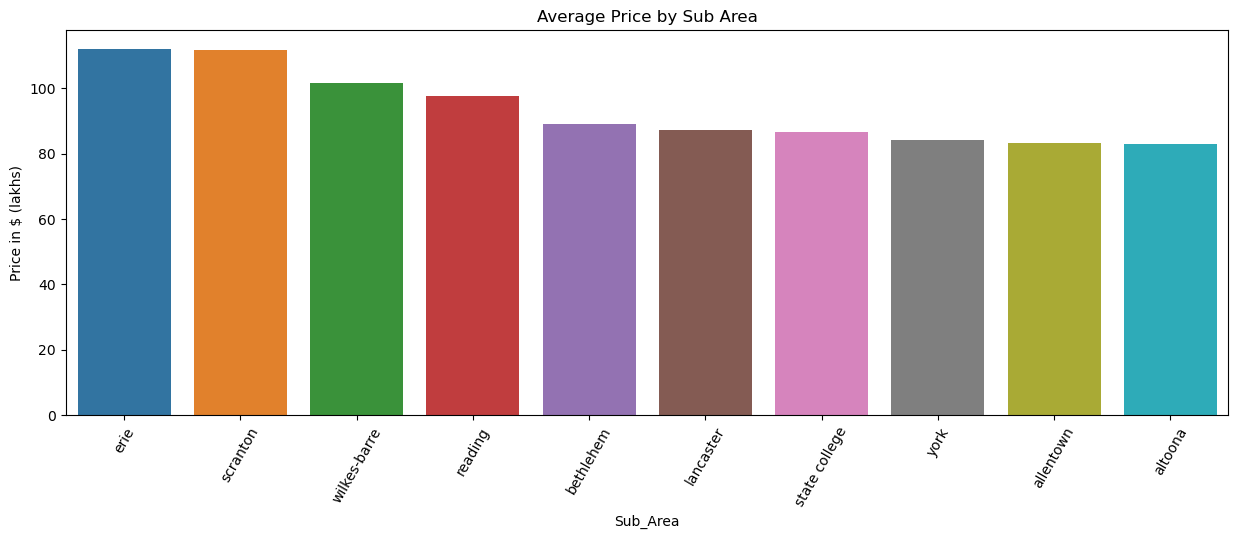

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15,5))
sns.barplot(x=temp['Sub_Area'],y=temp['Price in $ (lakhs)'])
plt.title("Average Price by Sub Area")
plt.xticks(rotation=60)
plt.show()

In [34]:
# wordcloud for extraction of text using nlp 
#!pip install wordcloud
#!pip install nltk

In [35]:
import re
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sowmy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sowmy\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [36]:
# Preprocessing the text data

REPLACE_BY_SPACE_RE = re.compile("[/(){}\[\]\|@,;!]")
BAD_SYMBOLS_RE = re.compile("[^0-9a-z #+_]")
STOPWORDS_nlp = set(stopwords.words('english'))

#Customized Stoplist
stoplist = ["i","project","living","home",'apartment',"pune","me","my","myself","we","our","ours","ourselves","you","you're","you've","you'll","you'd","your",
            "yours","yourself","yourselves","he","him","his","himself","she","she's","her","hers","herself","it",
            "it's","its","itself","they","them","their","theirs","themselves","what","which","who","whom","this","that","that'll",
            "these","those","am","is","are","was","were","be","been","being","have","has","had","having","do","does","did",
            "doing","a","an","the","and","but","if","or","because","as","until","while","of","at","by","for","with","about",
            "against","between","into","through","during","before","after","above","below","to","from","up","down","in","out",
            "on","off","over","under","again","further","then","once","here","there","when","where","why","all","any",
            "both","each","few","more","most","other","some","such","no","nor","not","only","own","same","so","than","too",
            "very","s","t","can","will","just","don","don't","should","should've","now","d","ll","m","o","re","ve","y","ain",
            "aren","couldn","didn","doesn","hadn","hasn",
            "haven","isn","ma","mightn","mustn","needn","shan","shan't",
            "shouldn","wasn","weren","won","rt","rt","qt","for",
            "the","with","in","of","and","its","it","this","i","have","has","would","could","you","a","an",
            "be","am","can","edushopper","will","to","on","is","by","ive","im","your","we","are","at","as","any","ebay","thank","hello","know",
            "need","want","look","hi","sorry","http", "https","body","dear","hello","hi","thanks","sir","tomorrow","sent","send","see","there","welcome","what","well","us"]

STOPWORDS_nlp.update(stoplist)


def text_prepare(text):
   
    text = text.replace("\d+"," ") # removing digits
    text = re.sub(r"(?:\@|https?\://)\S+", "", text) #removing mentions and urls
    text = text.lower() # lowercase text
    text =  re.sub('[0-9]+', '', text)
    text = REPLACE_BY_SPACE_RE.sub(" ", text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(" ", text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join([word for word in text.split() if word not in STOPWORDS_nlp]) # delete stopwors from text
    text = text.strip()
    return text

df_text = df["Description"].astype(str).apply(text_prepare)
df_text.head()

0    modern community bhk properties offering luxur...
1    located premium neighborhood bhk property offe...
2    spacious bhk homes large clubhouse park gym pe...
3    bhk grand properties offering high end ameniti...
4    located lancaster coming suburb community offe...
Name: Description, dtype: object

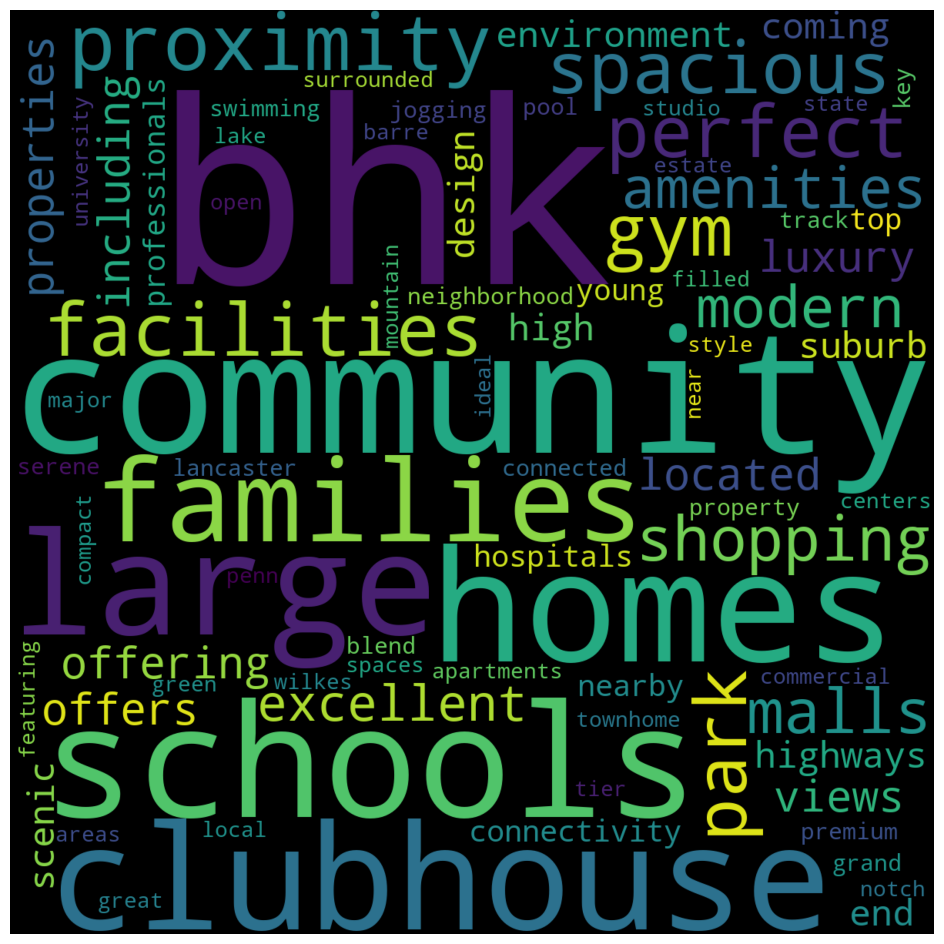

In [39]:
text = " ".join(sent for sent in df_text)
wordcloud = WordCloud(background_color = "Black", height=1200, width= 1200, collocations=False , max_words= 100).generate(text)
plt.figure(figsize= (16,12))
plt.imshow(wordcloud, interpolation = 'hamming')
plt.axis("off")
plt.show()

In [40]:
# cleaning the description column
df["Description"] =  df["Description"].astype(str).apply(text_prepare)

In [41]:
from collections import Counter
#nltk.download('averaged_perceptron_tagger')

def pos_counter(x,pos):
    tokens = nltk.word_tokenize(x.lower())
    tokens = [word for word in tokens if word not in STOPWORDS_nlp]
    text = nltk.Text(tokens)
    tags = nltk.pos_tag(text)
    counts = Counter(tag for word,tag in tags)
    return counts[pos]

df['Noun_Counts'] = df["Description"].apply(lambda x: pos_counter(x,'NN')) #nouns
df['Verb_Counts'] = df['Description'].apply(lambda x: (pos_counter(x,'VB')+pos_counter(x,'RB'))) #verbs
df['Adjective_Counts'] = df['Description'].apply(lambda x: pos_counter(x,'JJ')) #Adjectives
print(df.shape)
df.head()

(109, 22)


,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts
0,pennsylvania,usa,1.0,pittsburgh,lennar corporation,1,1,1,1,1,1,1,the heights at falling water,modern community bhk properties offering luxur...,492.0,39.0,65.701429,7,72.666667,6,0,1
1,pennsylvania,usa,2.0,philadelphia,toll brothers,1,1,1,1,1,1,1,chestnut hill village,located premium neighborhood bhk property offe...,774.0,65.0,60.295000,7,72.666667,6,0,4
2,pennsylvania,usa,3.0,allentown,ryan homes,1,1,1,1,1,1,1,the fields at blue barn,spacious bhk homes large clubhouse park gym pe...,889.0,74.0,83.152500,7,72.666667,6,0,3
3,pennsylvania,usa,3.0,harrisburg,pulte homes,1,1,1,1,1,1,1,the preserve at deer valley,bhk grand properties offering high end ameniti...,1018.0,89.0,82.745000,7,72.666667,4,0,3
4,pennsylvania,usa,2.0,lancaster,d.r. horton,1,1,1,1,1,1,1,meadows at wilshire downs,located lancaster coming suburb community offe...,743.0,74.0,87.152000,7,72.666667,3,1,2


In [44]:
#ngram feature
from sklearn.feature_extraction.text import CountVectorizer

In [45]:
cv = CountVectorizer(ngram_range=(2,2),max_features=15)
# cv = CountVectorizer() #takes one gram means only one word combinations
cv_object = cv.fit(df['Description'])

In [46]:
X = cv_object.transform(df['Description'])
print(X.shape)
X.toarray()

(109, 15)


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 1, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0]], dtype=int64)

In [53]:
cv_object.get_feature_names_out()

array(['bhk homes', 'clubhouse park', 'community offers',
       'connectivity modern', 'families proximity', 'gym perfect',
       'homes large', 'large clubhouse', 'park gym', 'perfect families',
       'properties offering', 'proximity schools', 'schools shopping',
       'shopping malls', 'spacious bhk'], dtype=object)

In [55]:
df_ngram = pd.DataFrame(X.toarray(),columns=cv_object.get_feature_names_out())
print(df_ngram.shape)
df_ngram.head()

(109, 15)


,bhk homes,clubhouse park,community offers,connectivity modern,families proximity,gym perfect,homes large,large clubhouse,park gym,perfect families,properties offering,proximity schools,schools shopping,shopping malls,spacious bhk
0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0


In [57]:
# Adding this to the main dataframe
df_final = pd.concat([df.reset_index(drop=True),df_ngram.reset_index(drop=True)],axis=1)
df_final.shape

(109, 37)

In [59]:
df_final.sample(10)

,State,Country,Property Type,Sub_Area,Company_Name,ClubHouse,School / University in Township,Hospital in TownShip,Mall in TownShip,Park / Jogging track,Swimming Pool,Gym,TownShip Name/ Society Name,Description,Property Area in Sq. Ft.,Price in $ (lakhs),Price by sub-area,Amenities score,Price by Amenities score,Noun_Counts,Verb_Counts,Adjective_Counts,bhk homes,clubhouse park,community offers,connectivity modern,families proximity,gym perfect,homes large,large clubhouse,park gym,perfect families,properties offering,proximity schools,schools shopping,shopping malls,spacious bhk
47,pennsylvania,usa,3.0,harrisburg,pulte homes,1,0,0,0,1,1,1,the preserve at deer valley,bhk grand properties offering high end ameniti...,1003.0,103.0,82.745000,4,100.511500,4,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
78,pennsylvania,usa,2.0,lancaster,d.r. horton,1,0,0,0,1,1,1,meadows at wilshire downs,located lancaster coming suburb community offe...,860.0,65.0,87.152000,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
84,pennsylvania,usa,3.0,york,lennar corporation,0,0,0,0,1,1,1,the villages at york,spacious bhk homes large clubhouse park gym pe...,1060.0,136.0,84.191429,3,71.537407,6,0,3,1,1,0,0,1,1,1,1,1,1,0,1,1,1,1
97,pennsylvania,usa,1.0,state college,m/i homes,1,0,0,0,1,1,1,brookwood townhomes,townhome style community offering excellent am...,575.0,65.0,123.614286,4,100.511500,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
29,pennsylvania,usa,3.0,wilkes-barre,d.r. horton,1,0,0,0,1,0,1,meadows at wilkes-barre,located wilkes barre coming suburb community o...,934.0,65.0,223.133333,3,71.537407,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
95,pennsylvania,usa,3.5,bethlehem,"nvr, inc.",1,0,0,0,1,1,1,greenfield apartments,compact studio apartments ideal young professi...,1660.2,201.8,90.300000,4,100.511500,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
58,pennsylvania,usa,2.0,wilkes-barre,d.r. horton,0,0,0,0,1,0,0,meadows at wilkes-barre,located wilkes barre coming suburb community o...,675.0,62.0,223.133333,1,53.810000,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
43,pennsylvania,usa,3.0,johnstown,d.r. horton,1,0,0,0,1,1,1,meadows at wilkes-barre,located wilkes barre coming suburb community o...,581.0,26.0,158.244444,4,100.511500,3,1,2,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0
21,pennsylvania,usa,3.0,bethlehem,"nvr, inc.",1,0,0,0,1,1,1,greenfield apartments,compact studio apartments ideal young professi...,1030.0,79.0,90.300000,4,100.511500,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
82,pennsylvania,usa,2.0,state college,m/i homes,1,0,0,0,1,0,1,brookwood townhomes,townhome style community offering excellent am...,644.0,47.3,123.614286,3,71.537407,5,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [61]:
# Saving the final dataframe with model features as csv file
df_final.to_csv(r"C:\Users\sowmy\OneDrive\Desktop\IS\Housing_price_model.csv",index=False)